In [1]:
from import_functions_generic import * 
from import_functions_plotting import * 
from functions_background import *
#from image_manipulation import * 

In [171]:
plt.style.use('classic')  
mpl.rc('image', cmap='viridis')#, origin='lower')
#mpl.rc('text', usetex=True)
#mpl.rc(mathtext.fontset = 'stix')


rcParams.update({'font.size': 13,  'axes.labelsize' : 13, 'legend.fontsize' : 12,
"font.family": "serif", 'text.usetex' : True, "font.serif": [], "font.sans-serif": [],
'legend.handlelength': 1.5, 'legend.borderaxespad' : 0.8, 'legend.columnspacing' : 1, 'legend.handletextpad' : 0.5})

rcParams['mathtext.fontset'] = 'stix'

In [3]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_v{}/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

In [529]:
def plot_fig(im, clab='', vmin=None, vmax=None, text='None', text_xfrac=0.03, text_yfrac=0.9, color_text='white',
        show_axis_ticks='off', im_crop=0,
        scalebar_pix=100, scalebar_leg='0.1"', platescale=12.25, color_scalebar='white',
        add_colorbar=1, cbar_xdeb=0.82, right=0.8, top=0.95, left=0.01, bottom=0.05, figsize=(5,4),
        interpolation='nearest', saving_dir='', namesave='test', save_png=0, cmap='magma',
        return_fig_ax=False, give_fig_ax=False, fig=None, ax=None):

    if not give_fig_ax: 
        fig, ax = plt.subplots(1,1, figsize=figsize)
        fig.subplots_adjust(left=left, right=right, top=top, bottom=bottom)
    ax.axis(show_axis_ticks)

    if im_crop != 0: im = im[im_crop:-im_crop,im_crop:-im_crop]

    if vmin != None and vmax != None: im_plot = ax.imshow(im, vmin=vmin, vmax=vmax, origin='lower', interpolation=interpolation, cmap=cmap)
    elif vmax != None : im_plot = ax.imshow(im, vmax=vmax, origin='lower', interpolation=interpolation, cmap=cmap)
    elif vmin != None : im_plot = ax.imshow(im, vmin=vmin, origin='lower', interpolation=interpolation, cmap=cmap)
    else : im_plot = ax.imshow(im, origin='lower', interpolation=interpolation, cmap=cmap)

    # Add text
    if text != 'None':
        w,h = np.shape(im)
        ax.text(w*text_xfrac,h*text_yfrac,text,color=color_text)

    # Add scalebar
    scalebar = AnchoredSizeBar(ax.transData, scalebar_pix/platescale, scalebar_leg, 3, label_top=True, pad=0.4,
                               sep=2, borderpad=0.5, frameon=False, size_vertical=1, color=color_scalebar)#,fontproperties=fp)
    ax.add_artist(scalebar)

    # Add colorbar
    if add_colorbar:
        # Color bar
        cb_xdeb, cb_ydeb, cb_xwidth, cb_ywidth = cbar_xdeb, 0.1, 0.03, 0.8
        cb_ax = fig.add_axes([cb_xdeb, cb_ydeb, cb_xwidth, cb_ywidth])

        cbar = fig.colorbar(im_plot, cax=cb_ax, orientation='vertical', #drawedges=True,
                            pad=0.8, shrink=0.05,fraction=0.01,aspect=50)#,width_fraction=0.001)

        cbar.set_label(clab)
    
    if return_fig_ax: return fig, ax
    else: 
        print('The file is saved here:\n', saving_dir+namesave)
        plt.savefig(saving_dir+namesave+'.pdf')
        if save_png: plt.savefig(saving_dir+namesave+'.png', dpi=200)
        plt.show()

In [192]:
help(fig.colorbar)

Help on method colorbar in module matplotlib.figure:

colorbar(mappable, cax=None, ax=None, use_gridspec=True, **kw) method of matplotlib.figure.Figure instance
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `~matplotlib.image.AxesImage`,
        `~matplotlib.contour.ContourSet`, etc.) described by this colorbar.
        This argument is mandatory for the `.Figure.colorbar` method but optional
        for the `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to generate
        colorbars not attached to a previously drawn artist, e.g. ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.
    
    ax : `~matplotlib.axes.Axes`, list of Axes, optional
        One or more parent axes

# General parameters for Figures

In [544]:
# Image - observation
pixel_scale=0.01225 # pixel scale in arcsec/px 
platescale = pixel_scale*1e3
scalebar_pix, scalebar_leg = 1000, '1"'
nx = 624 # number of pixels of your image in X
ny = 624 # number of pixels of your image in Y

# Save file .fits
writeto = False # save .fits file

# Figure
add_colorbar=1
figsize_rectange, figsize_square  = (4,3), (3,3)
figsize = np.where(add_colorbar, figsize_rectange, figsize_square)
left, right = 0.01, float(np.where(add_colorbar, 0.78, 0.99))
top, bottom = float(np.where(add_colorbar, 0.95, 0.99)), float(np.where(add_colorbar, 0.05, 0.01))
im_crop = 250
save_png = 1    # save .png file
cbar_xdeb = 0.83
scalebar_pix, scalebar_leg = 100, '0.1"'

text_xfrac, text_yfrac = 0.03, 0.84
filt='H'

# I. Load an observation

In [14]:
# Initialize the path to the wished data 
# -> supposed to be changed accordingly to the data/computer used
infolder = '/Users/desgranc/Documents/work/projects/HD120326/data/'
folder_prereduced = 'prereduced/convert/'
folder_reduced = 'reduced/'
dF       = pd.read_csv(infolder + 'list_obs.txt',sep='\t')
dF

,target,epoch,instrument,polar,filter,quality,"seeing ("")",tau0 (ms),delta pa (deg),PI,DIT (s),Nb frames,Total exposure (min)
0,HD_120326,2016-04-05,IRDIS,no,H23,good,1.1,3.5,37,Bonnefoy & Ménard,32.0,128.0,68.0
1,HD_120326,2016-06-03,IRDIS,no,H23,good,0.71,3.1,22,Hinkley & Matthews,32.0,80.0,43.0
2,HD_120326,2016-06-13,IRDIS,no,J23,to check,to check,to check,NaN,GTO,NaN,NaN,NaN
3,HD_120326,2018-06-01,IRDIS,yes,BB_H,very good,0.45,4.2,Boccaletti,NaN,NaN,NaN,NaN
4,HD_120326,2019-06-26,IRDIS,no,BB_H,very bad,1.84,2.4,36,Bonnefoy & Ménard,NaN,NaN,NaN
5,HD_120326,2019-07-09,IRDIS,no,BB_H,very good,0.54,3.1,58,Bonnefoy & Ménard,32.0,224.0,119.0
6,HD_120326,2016-04-05,IFS,no,YJ,good,1.1,3.5,37,Bonnefoy & Ménard,64.0,64.0,68.0
7,HD_120326,2016-06-03,IFS,no,YJ,good,0.71,3.1,22,Hinkley & Matthews,64.0,40.0,43.0
8,HD_120326,2019-06-26,IFS,no,YJ,very bad,1.84,2.4,36,Bonnefoy & Ménard,NaN,NaN,NaN
9,HD_120326,2019-07-09,IFS,no,YJ,very good,0.54,3.1,58,Bonnefoy & Ménard,64.0,112.0,119.0


In [17]:
idx = 5
epoch = str(dF['epoch'].iloc[idx])
instru = str(dF['instrument'].iloc[idx])
filt =  str(dF['filter'].iloc[idx]).replace('_','')
print('Load the epoch: {}'.format(epoch))

path_im_prereduced = infolder + folder_prereduced + instru + '/*{}*/'.format(epoch) + '*median_unsat.fits'
        
print('It corresponds do the path:\n{}'.format(path_im_prereduced))
print('\nFiles found:')
flist = glob(path_im_prereduced)
for f in flist: print('-',f)
im_prereduced = fits.getdata(flist[0])

Load the epoch: 2019-07-09
It corresponds do the path:
/Users/desgranc/Documents/work/projects/HD120326/data/prereduced/convert/IRDIS/*2019-07-09*/*median_unsat.fits

Files found:
- /Users/desgranc/Documents/work/projects/HD120326/data/prereduced/convert/IRDIS/HIP 67497_BB_H_2019-07-09_ird_convert_recenter_dc2021_BEAST_307407/ird_convert_recenter_dc2021-IRD_SCIENCE_PSF_MASTER_CUBE-median_unsat.fits


Size of the image = 62 and crop PCA = 0 i.e. size of the image shown = 62
Sum of the pixels in the image = 5259270.0
The file is saved here:
 figs/fig_v2023-5-2/im_psf_2019-07-09_IRDIS


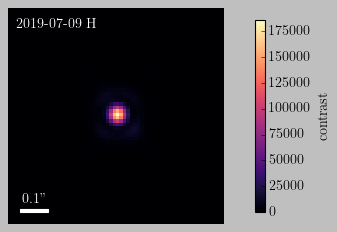

In [545]:
namesave = 'im_psf_{}_{}'.format(epoch, instru)
im = np.copy(im_prereduced)[1][0]
im_crop = 1
im = im[im_crop:-im_crop,im_crop:-im_crop,]
im_crop = 0

print('Size of the image =', len(im), 'and crop PCA =', im_crop, 'i.e. size of the image shown =',  len(im)-2*im_crop)

im_sum = np.nansum(im)
print('Sum of the pixels in the image =', im_sum)

clab = 'contrast'
vmin, vmax = None, None
text = '{} {}'.format(epoch, filt)
#text = '{} {} (total intensity)\n{}'.format(epoch, filt.replace('BB_',''), algo)


plot_fig(im=im, vmin=vmin, vmax=vmax, im_crop=im_crop, figsize=figsize,
         scalebar_pix=scalebar_pix, scalebar_leg=scalebar_leg, 
         add_colorbar=add_colorbar, clab=clab, cbar_xdeb=cbar_xdeb, 
         right=right, left=left, top=top, bottom=bottom,
         text=text, #text_xfrac=text_xfrac, text_yfrac=text_yfrac,
         saving_dir=saving_dir, save_png=save_png, namesave=namesave)

# II. Select the center of the image

(62, 62)


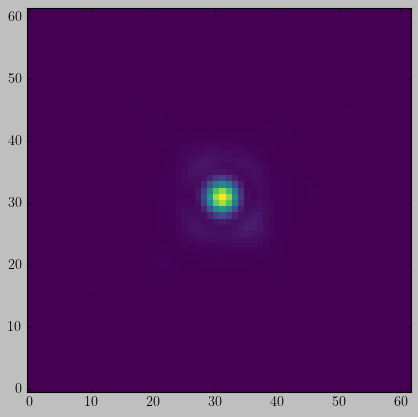

In [32]:
im = np.copy(im_prereduced[0,0])
im_crop=1
im_c = im[im_crop:-im_crop,im_crop:-im_crop]
im_mask = im_masked_center(im_c, r=30)
print(np.shape(im_mask))
plt.imshow(im_mask ,interpolation='nearest', origin='lower')

#### Test

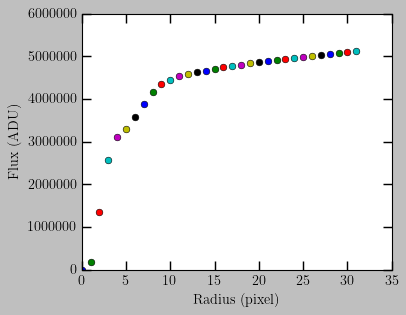

In [33]:
n = np.shape(im)[0]//2
fig, ax = plt.subplots(1,1,figsize=(5,4))
for X in range(n): 
    Y = flux_center_circle(im, X)
    ax.plot([X],[Y], marker='o')
ax.set_xlabel('Radius (pixel)')
ax.set_ylabel('Flux (ADU)')
mise_en_page(ax)
plt.savefig(saving_dir+'test_derive_flux_center_image.pdf')
plt.show()

# III. Select a annulus

#### Test

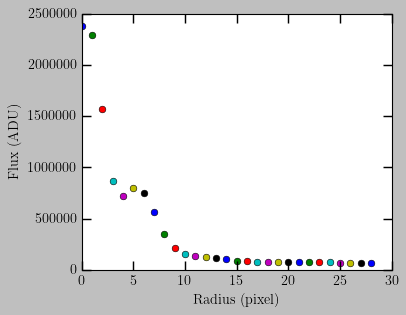

In [36]:
n = np.shape(im)[0]//2; dr =3
fig, ax = plt.subplots(1,1,figsize=(5,4))
for X in range(n-dr): 
    Y = flux_in_annulus(im, X, X+dr)
    ax.plot([X],[Y], marker='o')
ax.set_xlabel('Radius (pixel)')
ax.set_ylabel('Flux (ADU)')
#ax.set_yscale('log')
mise_en_page(ax)
plt.savefig(saving_dir+'test_derive_flux_ring_image.pdf')
plt.show()

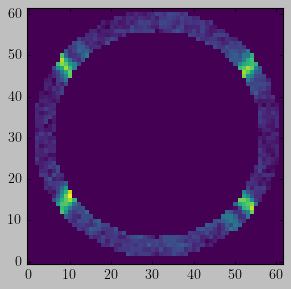

In [37]:
im = np.copy(im_prereduced[0,0])
im_crop=1
im_c = im[im_crop:-im_crop,im_crop:-im_crop]
im_mask = im_masked_annulus(im_c, 25, 30)
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.imshow(im_mask ,interpolation='nearest', origin='lower', vmin=0, vmax=np.nanmax(im_c))
plt.show()

Sum of flux values 1.1e+05


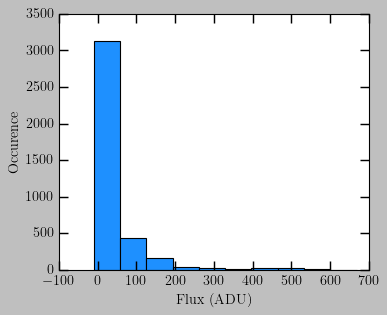

In [38]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(im_mask.flatten(), color='dodgerblue')
print('Sum of flux values','%.1e' % np.nansum(im_mask))
ax.set_xlabel('Flux (ADU)')
ax.set_ylabel('Occurence')
mise_en_page(ax)
plt.show()

# IRDIS

In [452]:
dF.head()

,target,epoch,instrument,polar,filter,quality,"seeing ("")",tau0 (ms),delta pa (deg),PI,DIT (s),Nb frames,Total exposure (min)
0,HD_120326,2016-04-05,IRDIS,no,H23,good,1.1,3.5,37,Bonnefoy & Ménard,32.0,128.0,68.0
1,HD_120326,2016-06-03,IRDIS,no,H23,good,0.71,3.1,22,Hinkley & Matthews,32.0,80.0,43.0
2,HD_120326,2016-06-13,IRDIS,no,J23,to check,to check,to check,NaN,GTO,NaN,NaN,NaN
3,HD_120326,2018-06-01,IRDIS,yes,BB_H,very good,0.45,4.2,Boccaletti,NaN,NaN,NaN,NaN
4,HD_120326,2019-06-26,IRDIS,no,BB_H,very bad,1.84,2.4,36,Bonnefoy & Ménard,NaN,NaN,NaN


In [619]:
idx = 0
epoch = str(dF['epoch'].iloc[idx])
instru = str(dF['instrument'].iloc[idx])
filt =  str(dF['filter'].iloc[idx]).replace('_','')
print('Load the epoch: {}'.format(epoch))

path_im_prereduced = infolder + folder_prereduced + instru + '/*{}*/'.format(epoch) + '*median_unsat.fits'
        
print('It corresponds do the path:\n{}'.format(path_im_prereduced))
print('\nFiles found:')
flist = glob(path_im_prereduced)
for f in flist: print('-',f)
im_prereduced = fits.getdata(flist[0])
print('Shape file:', np.shape(im_prereduced))

Load the epoch: 2016-04-05
It corresponds do the path:
/Users/desgranc/Documents/work/projects/HD120326/data/prereduced/convert/IRDIS/*2016-04-05*/*median_unsat.fits

Files found:
- /Users/desgranc/Documents/work/projects/HD120326/data/prereduced/convert/IRDIS/HIP 67497_DB_H23_2016-04-05_ird_convert_recenter_dc5_PUBLIC_204546/ird_convert_recenter_dc5-IRD_SCIENCE_PSF_MASTER_CUBE-median_unsat.fits
Shape file: (2, 2, 64, 64)


In [620]:
# Mask regions
r_star = 24
r_bkg_in = 25
r_bkg_out = 30
im_crop = 0

# Figure
color_star, color_bkg = 'gold', [0,0,0.3]; color_bkg_lighter='royalblue'
ms_star, ms_bkg = 7,5

color_scalebar='black'
color_text='black'
platescale=12.25

Size of the image = 62 and crop PCA = 0 i.e. size of the image shown = 62
Sum of the pixels in the image = 1063807.1
The file is saved here:
 figs/fig_v2023-5-2/im_psf_2016-04-05_IRDIS


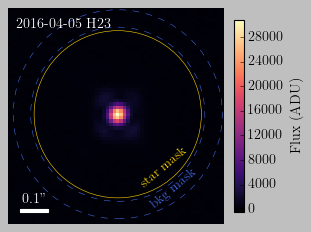

In [621]:
namesave = 'im_psf_{}_{}'.format(epoch, instru)
if len(np.shape(im_prereduced)) == 4:
    im = np.copy(im_prereduced)[1][0]
else : im = np.copy(im_prereduced)[0]
im_crop = 1
im = im[im_crop:-im_crop,im_crop:-im_crop]
im_crop = 0

print('Size of the image =', len(im), 'and crop PCA =', im_crop, 'i.e. size of the image shown =',  len(im)-2*im_crop)

im_sum = np.nansum(im)
print('Sum of the pixels in the image =', im_sum)

clab = 'Flux (ADU)'
vmin, vmax = None, None
text = '{} {}'.format(epoch, filt)
#text = '{} {} (total intensity)\n{}'.format(epoch, filt.replace('BB_',''), algo)

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.01,right=0.75, top=0.95, bottom=0.05)

## Add masks, text
# Star (circle)
x0, y0 = np.shape(im)[1]//2,  np.shape(im)[1]//2
circle = Circle((x0,y0),r_star,ec=color_star,fc='None',ls='-',lw=0.5)
ax.add_patch(circle)
# Background (annulus)
x0, y0 = np.shape(im)[1]//2,  np.shape(im)[1]//2
circle = Circle((x0,y0),r_bkg_in,ec=color_bkg_lighter,fc='None',ls='--',lw=0.5)
ax.add_patch(circle)
circle = Circle((x0,y0),r_bkg_out,ec=color_bkg_lighter,fc='None',ls='--',lw=0.5)
ax.add_patch(circle)
ax.text(0.6,0.17,'star mask',color=color_star,transform=ax.transAxes,rotation=40,fontsize=12)
ax.text(0.65,0.07,'bkg mask',color=color_bkg_lighter,transform=ax.transAxes,rotation=40,fontsize=12)



plot_fig(im=im, vmin=vmin, vmax=vmax, im_crop=im_crop, figsize=figsize,
         scalebar_pix=scalebar_pix, scalebar_leg=scalebar_leg, platescale=platescale,
         add_colorbar=add_colorbar, clab=clab, cbar_xdeb=0.75, 
         right=right, left=left, top=top, bottom=bottom,
         text=text, #text_xfrac=text_xfrac, text_yfrac=text_yfrac,
         saving_dir=saving_dir, save_png=save_png, namesave=namesave,
         give_fig_ax=1, fig=fig, ax=ax)

##### Region of the image considered to derive the flux of the star

-73.0141 186541.3
The file is saved here:
 figs/fig_v2023-5-2/star_flux_2019-07-09_IRDIS_image_masked


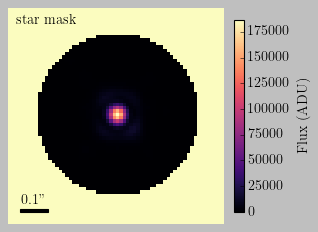

In [554]:
# Region of the image considered to derive the flux of the star
if len(np.shape(im_prereduced)) == 4:
    im = np.copy(im_prereduced[0,0])
else : im = np.copy(im_prereduced)[0]

if im_crop == 0 : im_c = im
else: im_c = im[im_crop:-im_crop,im_crop:-im_crop]

im_mask = im_masked_center(im_c, r=r_star)

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.01,right=0.75, top=0.95, bottom=0.05)
#ax.imshow(im_mask ,interpolation='nearest', origin='lower', vmin=np.nanmin(im_c), vmax=np.nanmax(im_c))
print(np.nanmin(im_c), np.nanmax(im_c))
text = 'star mask'
namesave = 'star_flux_'+epoch+'_'+instru.replace(' ','_')+'_image_masked'
im_mask[im_mask ==0] = np.nanmax(im_mask)
plot_fig(im_mask, color_scalebar=color_scalebar, platescale=platescale, text=text, color_text=color_text,
         text_yfrac=0.92, 
         text_xfrac=0.03, clab='Flux (ADU)', cbar_xdeb=0.75,
         give_fig_ax=1, fig=fig, ax=ax, saving_dir=saving_dir, namesave=namesave)
#plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

Sum of flux values 4.4e+08


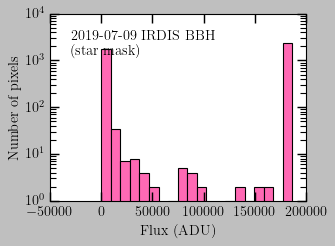

In [513]:
# Distribution flux values
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.15,bottom=0.17,top=0.95,right=0.95)
ax.hist(im_mask.flatten(), 20, color='hotpink')
print('Sum of flux values','%.1e' % np.nansum(im_mask))
ax.set_xlabel('Flux (ADU)')
ax.set_ylabel('Number of pixels')
ax.set_yscale('log')
# Add text
text = '{} {} {} \n(star mask)'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.78,text,transform=ax.transAxes)
namesave = 'star_flux_'+epoch+'_'+instru.replace(' ','_')+'_hist'
mise_en_page(ax)
plt.savefig(saving_dir+namesave+'.pdf')

plt.show()

##### Region of the image considered to derive the flux of the background

-10.619525 668.05664
The file is saved here:
 figs/fig_v2023-5-2/annulus_bkgd_flux_2019-07-09_IRDIS


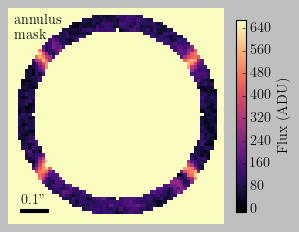

In [514]:
# Region of the image considered to derive the flux of the background
if len(np.shape(im_prereduced)) == 4:
    im = np.copy(im_prereduced[0,0])
else : im = np.copy(im_prereduced)[0]
  

if im_crop == 0 : im_c = im
else: im_c = im[im_crop:-im_crop,im_crop:-im_crop]
im_mask = im_masked_annulus(im_c, r_bkg_in, r_bkg_out)
im_mask[im_mask==0] = np.nanmax(im_mask)
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.01,right=0.8, top=0.99)
#ax.imshow(im_mask ,interpolation='nearest', origin='lower', vmin=np.nanmin(im_c), vmax=np.nanmax(im_c))
print(np.nanmin(im_c), np.nanmax(im_c))
text = 'annulus \nmask'
namesave = 'annulus_bkgd_flux_'+epoch+'_'+instru.replace(' ','_')
plot_fig(im_mask, color_scalebar=color_scalebar, platescale=platescale, text=text, color_text=color_text,
         text_yfrac=0.85, 
         text_xfrac=0.02, clab='Flux (ADU)', cbar_xdeb=0.78,
         give_fig_ax=1, fig=fig, ax=ax, saving_dir=saving_dir, namesave=namesave)
#plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

Sum of flux values 2.3e+06


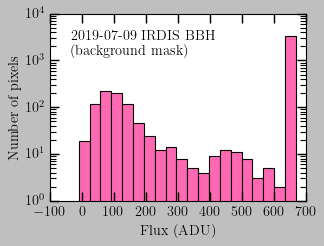

In [515]:
# Distribution flux values
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.15,bottom=0.17,top=0.95,right=0.95)
ax.hist(im_mask.flatten(), 20, color='hotpink')
print('Sum of flux values','%.1e' % np.nansum(im_mask))
ax.set_xlabel('Flux (ADU)')
ax.set_ylabel('Number of pixels')
ax.set_yscale('log')

# Add text
text = '{} {} {} \n(background mask)'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.78,text,transform=ax.transAxes)

namesave = 'annulus_bkgd_flux_'+epoch+'_'+instru.replace(' ','_')+'_hist'
mise_en_page(ax)
plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

#### Plot stellar flux _versus_ background flux

In [516]:
if 0 : 
    # Figure Flux as the function of the annulus considered for the background estimation
    if len(np.shape(im_prereduced)) == 4:
        # Several psf
        for i in range(np.shape(im_prereduced)[1]):
            fig, ax = plt.subplots(1,1,figsize=(5,4))
            im_i = np.copy(im_prereduced[i])
            # Several channels
            for ilbd in range(np.shape(im_i)[0]):
                im = np.copy(im_i[ilbd])
                print(np.shape(im))
                n = np.shape(im)[0]//2; dr=5
                for X in range(n-dr): 
                    Y_bkgd = flux_in_annulus(im, X, X+dr)
                    Y_star = flux_center_circle(im,4)
                    #print(X,Y)
                    ax.plot([X],[Y_bkgd], marker='o')
                    ax.plot([X],[Y_star], marker='*')

            ax.set_xlabel('Radius (pixel)')
            ax.set_ylabel('Flux (ADU)')
            #ax.set_yscale('log')
            mise_en_page(ax)
            #plt.savefig(saving_dir+'test_derive_flux_ring_image.pdf')
    plt.show()

#### in terms of spectral channel

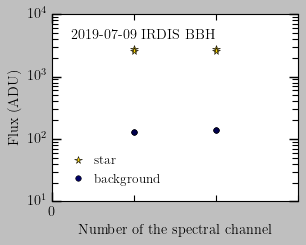

In [525]:
# Figure Flux as the spectral channel
figsize = (4,3)
nlbd = np.shape(im_prereduced)[0]

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.2,bottom=0.17, top=0.95, right=0.97)
norm = 1e3

# Several PSFs
if len(np.shape(im_prereduced)) == 4:
    for i in range(np.shape(im_prereduced)[1]):
        im_i = np.copy(im_prereduced[:,i])#/norm
        shortcut_plot_flux_star_and_background(ax, im_i, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out, 
                    ms_star=ms_star, ms_bkg=ms_bkg, color_star=color_star, color_bkg=color_bkg, 
                    do_norm=1, display=0)
        
# One PSF
if len(np.shape(im_prereduced)) == 3:
    shortcut_plot_flux_star_and_background(ax, im_prereduced, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out,
            ms_star=ms_star, ms_bkg=ms_bkg, color_star=color_star, color_bkg=color_bkg, do_norm=1, display=0)
    
# Add labels
ax.set_xlabel('Number of the spectral channel')
ax.set_ylabel(r'Flux (ADU)')

# Change size
if epoch == '2019-07-09':
    ax.set_xlim([0, nlbd+1])
    loc='lower left'
    ax.set_ylim([10, 1e4]); y_maj_step=200; y_min_step=50
if epoch == '2016-04-05':
    ax.set_xlim([0, nlbd+1])
    ax.set_ylim([1, 5e3]); y_maj_step=100; y_min_step=20
    loc='lower right'
if epoch == '2016-06-03':
    ax.set_xlim([0, nlbd+1])
    ax.set_ylim([1, 5e3]); loc='lower right'; y_maj_step=50; y_min_step=10
    
ax.set_yscale('log')

# Add text
text = '{} {} {}'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.87,text,transform=ax.transAxes)

# Add legend
ax.plot([-10],[0], marker='*', ms=7, label= 'star', lw=0, color='gold')
ax.plot([-10],[0], marker='o', ms=5, label= 'background', lw=0, color=[0,0,0.4])
ax.legend(loc=loc, numpoints=1, frameon=False)
# Save
if r_star < 6 :
    mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1, y_step=1, y_maj_step=500, y_min_step=100)
mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1, y_step=0, y_maj_step=y_maj_step, y_min_step=y_min_step) 
namesave = 'check_star_and_bkgd_flux_'+text.replace(' ','_')
plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

## IFS

In [765]:
idx = 9
epoch = str(dF['epoch'].iloc[idx])
instru = str(dF['instrument'].iloc[idx])
filt =  str(dF['filter'].iloc[idx])
print('Load the epoch: {}'.format(epoch))

path_im_prereduced = infolder + folder_prereduced + instru + '/*{}*/'.format(epoch) + '*median_unsat.fits'
        
print('It corresponds do the path:\n{}'.format(path_im_prereduced))
print('\nFiles found:')
flist = glob(path_im_prereduced)
for f in flist: print('-',f)
im_prereduced = fits.getdata(flist[0])
print('Shape file:', np.shape(im_prereduced))

Load the epoch: 2019-07-09
It corresponds do the path:
/Users/desgranc/Documents/work/projects/HD120326/data/prereduced/convert/IFS/*2019-07-09*/*median_unsat.fits

Files found:
- /Users/desgranc/Documents/work/projects/HD120326/data/prereduced/convert/IFS/HIP 67497_OBS_YJ_2019-07-09_ifs_convert_dc2_PUBLIC_357580/ifs_convert_dc2-IFS_SCIENCE_PSF_MASTER_CUBE-median_unsat.fits
Shape file: (39, 2, 64, 64)


In [817]:
# Mask regions
r_star = 24
r_bkg_in = 25
r_bkg_out = 30
im_crop = 0

# Figure
color_scalebar='black'
color_text='black'
platescale=7.46

im_before_after = 1

Size of the image = 62 and crop PCA = 0 i.e. size of the image shown = 62
Sum of the pixels in the image = 95493.06
The file is saved here:
 figs/fig_v2023-5-2/im_psf_2019-07-09_IFS


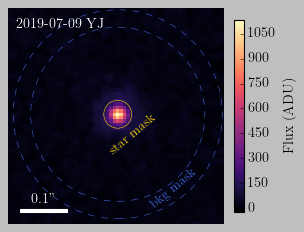

In [815]:
namesave = 'im_psf_{}_{}'.format(epoch, instru)
if len(np.shape(im_prereduced)) == 4:
    im = np.copy(im_prereduced)[0][im_before_after]
else : im = np.copy(im_prereduced)[0]
im_crop = 1
im = im[im_crop:-im_crop,im_crop:-im_crop]
im_crop = 0

print('Size of the image =', len(im), 'and crop PCA =', im_crop, 'i.e. size of the image shown =',  len(im)-2*im_crop)

im_sum = np.nansum(im)
print('Sum of the pixels in the image =', im_sum)

clab = 'Flux (ADU)'
vmin, vmax = None, None
text = '{} {}'.format(epoch, filt)
#text = '{} {} (total intensity)\n{}'.format(epoch, filt.replace('BB_',''), algo)

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.01,right=0.75, top=0.95, bottom=0.05)

## Add masks, text
# Star (circle)
x0, y0 = np.shape(im)[1]//2,  np.shape(im)[1]//2
circle = Circle((x0,y0),r_star,ec=color_star,fc='None',ls='-',lw=0.5)
ax.add_patch(circle)
# Background (annulus)
x0, y0 = np.shape(im)[1]//2,  np.shape(im)[1]//2
circle = Circle((x0,y0),r_bkg_in,ec=color_bkg_lighter,fc='None',ls='--',lw=0.5)
ax.add_patch(circle)
circle = Circle((x0,y0),r_bkg_out,ec=color_bkg_lighter,fc='None',ls='--',lw=0.5)
ax.add_patch(circle)
if r_star == 24:
    ax.text(0.6,0.17,'star mask',color=color_star,transform=ax.transAxes,rotation=40,fontsize=12)
else: 
    ax.text(0.46,0.32,'star mask',color=color_star,transform=ax.transAxes,rotation=40,fontsize=12)
ax.text(0.65,0.07,'bkg mask',color=color_bkg_lighter,transform=ax.transAxes,rotation=40,fontsize=12)

plot_fig(im=im, vmin=vmin, vmax=vmax, im_crop=im_crop, figsize=figsize,
         scalebar_pix=scalebar_pix, scalebar_leg=scalebar_leg, platescale=platescale,
         add_colorbar=add_colorbar, clab=clab, cbar_xdeb=0.75, 
         right=right, left=left, top=top, bottom=bottom,
         text=text, #text_xfrac=text_xfrac, text_yfrac=text_yfrac,
         saving_dir=saving_dir, save_png=save_png, namesave=namesave,
         give_fig_ax=1, fig=fig, ax=ax)

/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_1317/1299577078.py:42: RuntimeWarning: Mean of empty slice
  noise_annulus = np.nanmean(im_annulus)
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_1317/1299577078.py:42: RuntimeWarning: Mean of empty slice
  noise_annulus = np.nanmean(im_annulus)


31
31
31


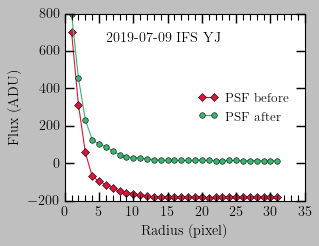

In [816]:
# Radial Profile
im = np.copy(im_prereduced)[0][0]
profile_mean, separations = rad_profile(im, center=np.shape(im)[0]//2, mode='mean', pixscale=platescale*1e-3, skip_pix=1)

# Figure
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.2,right=0.95, top=0.95, bottom=0.17)

# PSF before
im = np.copy(im_prereduced)[0][0]
profile_mean, separations = rad_profile(im, center=np.shape(im)[0]//2, mode='mean', pixscale=platescale*1e-3, skip_pix=1)
ax.plot(separations/platescale*1e3, profile_mean, color='crimson',marker='D', ms=5, label='PSF before')
# PSF after
im = np.copy(im_prereduced)[0][1]
profile_mean, separations = rad_profile(im, center=np.shape(im)[0]//2, mode='mean', pixscale=platescale*1e-3, skip_pix=1)
ax.plot(separations/platescale*1e3, profile_mean, color='mediumseagreen',marker='o', ms=5, label='PSF after')


ax.set_xlabel('Radius (pixel)')
ax.set_ylabel('Flux (ADU)')

ax.legend(frameon=False, loc='center right')

text = '{} {} {}'.format(epoch, instru, filt.replace('_',''))
ax.text(0.17,0.85,text,transform=ax.transAxes)

namesave = 'radial_profile_flux_'+epoch+'_'+instru.replace(' ','_')
mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1)
plt.savefig(saving_dir+namesave+'.pdf')


##### Region of the image considered to derive the flux of the star

-22.723724 1132.2158
The file is saved here:
 figs/fig_v2023-5-2/star_flux_2019-07-09_IFS_image_masked


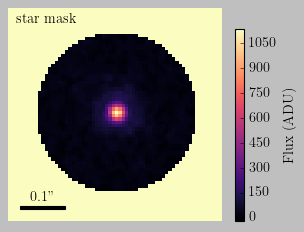

In [805]:
# Region of the image considered to derive the flux of the star
if len(np.shape(im_prereduced)) == 4:
    im = np.copy(im_prereduced[0,im_before_after ])
else : im = np.copy(im_prereduced)[0]

if im_crop == 0 : im_c = im
else: im_c = im[im_crop:-im_crop,im_crop:-im_crop]
im_mask = im_masked_center(im_c, r=r_star)

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.01,right=0.8, top=0.99)
#ax.imshow(im_mask ,interpolation='nearest', origin='lower', vmin=np.nanmin(im_c), vmax=np.nanmax(im_c))
print(np.nanmin(im_c), np.nanmax(im_c))
text = 'star mask'
namesave = 'star_flux_'+epoch+'_'+instru.replace(' ','_')+'_image_masked'
im_mask[im_mask ==0] = np.nanmax(im_mask)
plot_fig(im_mask, color_scalebar=color_scalebar, platescale=platescale, text=text, color_text=color_text,
         text_yfrac=0.92, 
         text_xfrac=0.03, clab='Flux (ADU)', cbar_xdeb=0.78,
         give_fig_ax=1, fig=fig, ax=ax, saving_dir=saving_dir, namesave=namesave)
#plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

In [806]:
im_count = np.copy(im_mask)
im_count[im_count!=0]=1
nb_pix_star = np.nansum(im_count)
print('Number of pixels considered:', nb_pix_star)

Number of pixels considered: 4096.0


##### In this region, distribution of the flux values

Sum of flux values 2.7e+06


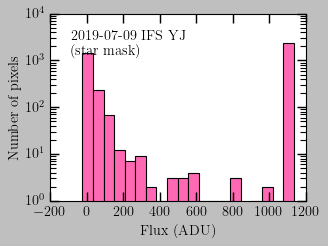

In [807]:
# Distribution flux values
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.15,bottom=0.17,top=0.95,right=0.95)
ax.hist(im_mask.flatten(), 20, color='hotpink')
print('Sum of flux values','%.1e' % np.nansum(im_mask))
ax.set_xlabel('Flux (ADU)')
ax.set_ylabel('Number of pixels')
ax.set_yscale('log')
# Add text
text = '{} {} {} \n(star mask)'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.78,text,transform=ax.transAxes)
namesave = 'star_flux_'+epoch+'_'+instru.replace(' ','_')+'_hist'
mise_en_page(ax)
plt.savefig(saving_dir+namesave+'.pdf')

plt.show()

##### Region of the image considered to derive the flux of the background

-16.15166 57.040997
The file is saved here:
 figs/fig_v2023-5-2/annulus_bkgd_flux_2019-07-09_IFS


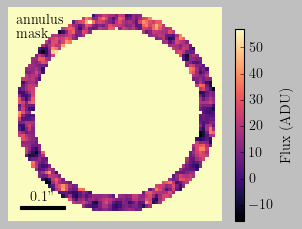

In [808]:
# Region of the image considered to derive the flux of the background
if len(np.shape(im_prereduced)) == 4:
    im = np.copy(im_prereduced[0,im_before_after])
else : im = np.copy(im_prereduced)[0]
    
im_crop=0
if im_crop == 0 : im_c = im
else: im_c = im[im_crop:-im_crop,im_crop:-im_crop]
im_mask = im_masked_annulus(im_c, 25, 30)
im_mask[im_mask==0] = np.nanmax(im_mask)
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.01,right=0.8, top=0.99)
#ax.imshow(im_mask ,interpolation='nearest', origin='lower', vmin=np.nanmin(im_c), vmax=np.nanmax(im_c))
print(np.nanmin(im_c), np.nanmax(im_c))
text = 'annulus \nmask'
namesave = 'annulus_bkgd_flux_'+epoch+'_'+instru.replace(' ','_')
plot_fig(im_mask, color_scalebar=color_scalebar, platescale=platescale, text=text, color_text=color_text,
         text_yfrac=0.85, 
         text_xfrac=0.03, clab='Flux (ADU)', cbar_xdeb=0.78,
         give_fig_ax=1, fig=fig, ax=ax, saving_dir=saving_dir, namesave=namesave)
#plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

In [809]:
im_count = np.copy(im_mask)
im_count[im_count!=0]=1
nb_pix_bkg = np.nansum(im_count)
print('Number of pixels considered:', nb_pix_bkg)

Number of pixels considered: 4096.0


##### In this region, distribution of the flux values

Sum of flux values 2.0e+05


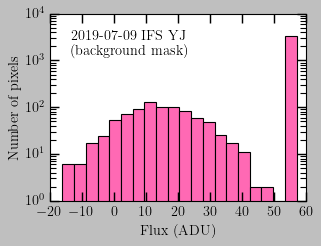

In [810]:
# Distribution flux values
fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.15,bottom=0.17,top=0.95,right=0.95)
ax.hist(im_mask.flatten(), 20, color='hotpink')
print('Sum of flux values','%.1e' % np.nansum(im_mask))
ax.set_xlabel('Flux (ADU)')
ax.set_ylabel('Number of pixels')
ax.set_yscale('log')

# Add text
text = '{} {} {} \n(background mask)'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.78,text,transform=ax.transAxes)

namesave = 'annulus_bkgd_flux_'+epoch+'_'+instru.replace(' ','_')+'_hist'
mise_en_page(ax)
plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

#### Derive the stellar and background flux for each spectral channel

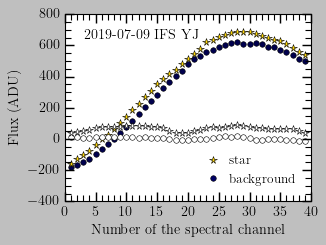

In [812]:
# Figure Flux as the spectral channel
figsize = (4,3)
nlbd = np.shape(im_prereduced)[0]

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.2,bottom=0.17, top=0.95, right=0.97)
norm = 1e3

# Several PSFs
if len(np.shape(im_prereduced)) == 4:
    for i in range(np.shape(im_prereduced)[1]):
        #if i == 1 : continue
        im_i = np.copy(im_prereduced[:,i])#/norm
        if i == 1:
            shortcut_plot_flux_star_and_background(ax, im_i, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out, 
                    ms_star=ms_star, ms_bkg=ms_bkg, color_star='w', color_bkg='w', 
                    do_norm=1, display=0)
        else: 
            shortcut_plot_flux_star_and_background(ax, im_i, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out, 
                    ms_star=ms_star, ms_bkg=ms_bkg, color_star=color_star, color_bkg=color_bkg, 
                    do_norm=1, display=0)
        
# One PSF
if len(np.shape(im_prereduced)) == 3:
    shortcut_plot_flux_star_and_background(ax, im_prereduced, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out,
            ms_star=ms_star, ms_bkg=ms_bkg, color_star=color_star, color_bkg=color_bkg, do_norm=1, display=0)
    
# Add labels
ax.set_xlabel('Number of the spectral channel')
ax.set_ylabel(r'Flux (ADU)')

# Change size
if epoch == '2019-07-09':
    ax.set_xlim([0, nlbd+1])
    #ax.set_ylim([-3e5/norm, 6e5/norm])
    loc='lower right'
    if r_star < 6 : ax.set_ylim([-500, 2500]); y_maj_step=500; y_min_step=100
    else: ax.set_ylim([-400, 800]); y_maj_step=200; y_min_step=50
if epoch == '2016-04-05':
    ax.set_xlim([0, nlbd+1])
    if r_star < 6 : ax.set_ylim([0, 2500])
    else: ax.set_ylim([0, 400]); y_maj_step=100; y_min_step=20
    loc='upper right'
if epoch == '2016-06-03':
    ax.set_xlim([0, nlbd+1])
    if r_star < 6 : ax.set_ylim([0, 2000]); loc='lower right'
    else: ax.set_ylim([0, 150]); loc='upper right'; y_maj_step=50; y_min_step=10
    
#ax.set_yscale('log')

# Add text
text = '{} {} {}'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.87,text,transform=ax.transAxes)

# Add legend
ax.plot([-10],[0], marker='*', ms=7, label= 'star', lw=0, color='gold')
ax.plot([-10],[0], marker='o', ms=5, label= 'background', lw=0, color=[0,0,0.4])
ax.legend(loc=loc, numpoints=1, frameon=False)
# Save
if r_star < 6 :
    mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1, y_step=1, y_maj_step=500, y_min_step=100)
mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1, y_step=1, y_maj_step=y_maj_step, y_min_step=y_min_step) 
namesave = 'check_star_and_bkgd_flux_'+text.replace(' ','_')
plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

## Check spectral channel transmission

No handles with labels found to put in legend.


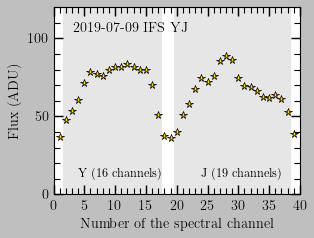

In [825]:
# Figure Flux as the spectral channel
figsize = (4,3)
nlbd = np.shape(im_prereduced)[0]

fig, ax = plt.subplots(1,1,figsize=figsize)
fig.subplots_adjust(left=0.2,bottom=0.17, top=0.95, right=0.97)

norm = 1e3

# Several PSFs
if len(np.shape(im_prereduced)) == 4:
    for i in range(np.shape(im_prereduced)[1]):
        if i == 0 : continue
        im_i = np.copy(im_prereduced[:,i])#/norm
        if i == 1:
            shortcut_plot_flux_star_and_background(ax, im_i, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out, 
                    ms_star=ms_star, ms_bkg=ms_bkg, color_star='w', color_bkg='w', plot_bkg=0,
                    do_norm=1, display=0)
        if 1: 
            shortcut_plot_flux_star_and_background(ax, im_i, r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out, 
                    ms_star=ms_star, ms_bkg=ms_bkg, color_star=color_star, color_bkg=color_bkg, plot_bkg=0,
                    do_norm=1, display=0)
# One PSF
if len(np.shape(im_prereduced)) == 3:
    shortcut_plot_flux_star_and_background(ax, im_prereduced, 
                    r_star=r_star, r_bkg_in=r_bkg_in, r_bkg_out=r_bkg_out,plot_bkg=0,
                    ms_star=ms_star, ms_bkg=ms_bkg, color_star=color_star, color_bkg=color_bkg)
    
# Add labels
ax.set_xlabel('Number of the spectral channel')
ax.set_ylabel(r'Flux (ADU)')

# Change size
if epoch == '2019-07-09':
    ax.set_xlim([0, nlbd+1])
    if r_star < 6 :ax.set_ylim([0, 2500])
    #else: ax.set_ylim([-200, 800]); y_maj_step=200; y_min_step=50
    else: ax.set_ylim([0, 120]); y_maj_step=50; y_min_step=10
if epoch == '2016-04-05':
    ax.set_xlim([0, nlbd+1])
    #ax.set_ylim([20000/norm, 120000/norm])
    if r_star < 6 : pass
    else: ax.set_ylim([0, 400]); y_maj_step=100; y_min_step=20
if epoch == '2016-06-03':
    ax.set_xlim([0, nlbd+1])
    if r_star < 6 : ax.set_ylim([0, 2000])
    else: ax.set_ylim([0, 150]);  y_maj_step=50; y_min_step=10

# Add zones
xlim = ax.get_xlim()
ylim = ax.get_ylim()
Ychannels = [2,17]
Jchannels = [20,38]
ax.fill_between([Ychannels[0]-0.4, Ychannels[1]+0.4], [ylim[1],ylim[1]], [ylim[0],ylim[0]], color=[0.9,0.9,0.9])
ax.fill_between([Jchannels[0]-0.4, Jchannels[1]+0.4], [ylim[1],ylim[1]], [ylim[0],ylim[0]], color=[0.9,0.9,0.9])

# Add text
text = '{} {} {}'.format(epoch, instru, filt.replace('_',''))
ax.text(0.08,0.87,text,transform=ax.transAxes)

ax.text(0.1,0.1,'Y ({} channels)'.format(Ychannels[1]-Ychannels[0]+1), fontsize=11, transform=ax.transAxes)
ax.text(0.6,0.1,'J ({} channels)'.format(Jchannels[1]-Jchannels[0]+1), fontsize=11, transform=ax.transAxes)

ax.set_ylim(ylim)

# Add legend
#ax.plot([-10],[Y_star], marker='*', ms=12, markerfacecolor='None', label= 'star', lw=0)
#ax.plot([-10],[Y_star], marker='o', ms=8, markerfacecolor='None', label= 'background', lw=0)
ax.legend(loc='lower right', numpoints=1, frameon=False)
# Save 
if r_star < 6: mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1, y_step=1, y_maj_step=500, y_min_step=100)
else: mise_en_page(ax, x_step=1, x_maj_step=5, x_min_step=1, y_step=1, y_maj_step=y_maj_step, y_min_step=y_min_step)
namesave = 'check_transmission_'+text.replace(' ','_')
plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

In [348]:
help(ax.fill_betweenx)

Help on method fill_betweenx in module matplotlib.axes._axes:

fill_betweenx(y, x1, x2=0, where=None, step=None, interpolate=False, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Fill the area between two vertical curves.
    
    The curves are defined by the points (*y*, *x1*) and (*y*,
    *x2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some vertical sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *y*.
    
    Parameters
    ----------
    y : array (length N)
        The y coordinates of the nodes defining the curves.
    
    x1 : array (length N) or scalar
        The x coordinates of the nodes defining the first curve.
    
    x2 : array (length N) or scalar, default: 0
        The x coordinates of the nodes defining the second curve.
    
    wh

# Bin

In [ ]:
# Allow negative values with two scales - not so useful

# Figure Flux as the spectral channel
figsize = (4,3)
nlbd = np.shape(im_prereduced)[0]

fig, (ax_pos, ax_neg) = plt.subplots(2,1,figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [6, 3]},  facecolor='w')
fig.subplots_adjust(left=0.16,bottom=0.17, top=0.95, right=0.97, hspace=0)


## Double axis


# Hide the spines between ax and ax2
ax_neg.spines['top'].set_visible(False)
ax_pos.spines['bottom'].set_visible(False)
ax_pos.xaxis.tick_top()
ax_pos.tick_params(labelbottom='off')
ax_neg.tick_params(labeltop='off')
ax_neg.xaxis.tick_bottom()


# Several PSFs
if len(np.shape(im_prereduced)) == 4:
    for i in range(np.shape(im_prereduced)[1]):
        if i == 1 : continue
        im_i = np.copy(im_prereduced[:,i])
        shortcut_plot_flux_star_and_background(ax_pos, im_i, r_star=6, r_bkg_in=25, r_bkg_out=30)
        shortcut_plot_flux_star_and_background(ax_neg, im_i, r_star=6, r_bkg_in=25, r_bkg_out=30)
        
# One PSF
if len(np.shape(im_prereduced)) == 3:
    shortcut_plot_flux_star_and_background(ax, im_prereduced)
    
# Add labels
ax_neg.set_xlabel('Number of the spectral channel')
ax_pos.set_ylabel('Flux (ADU)')

# Change size
ax_neg.set_xlim([0.5, nlbd+0.5])
#ax.set_ylim([1e4, 1e9])
#ax_neg.set_yscale('log')
#ax_pos.set_yscale('log')

# Add text
text = '{} {}'.format(epoch, filt.replace('_',''))
ax_pos.text(0.08,0.8,text,transform=ax_pos.transAxes)

# Add legend
ax_neg.plot([-10],[Y_star], marker='*', ms=12, markerfacecolor='None', label= 'star', lw=0)
ax_neg.plot([-10],[Y_star], marker='o', ms=8, markerfacecolor='None', label= 'background', lw=0)
ax_neg.legend(loc='lower right', numpoints=1, frameon=False)

ax_pos.set_ylim([0, 6e5])
ax_neg.set_ylim([-2e5, 10])
# Hide the spines between ax and ax2
ax_neg.spines['top'].set_visible(False)
ax_pos.spines['bottom'].set_visible(False)
ax_pos.xaxis.tick_top()
ax_neg.tick_params(labeltop='off')
ax_neg.xaxis.tick_bottom()


# Save
mise_en_page(ax_neg, x_step=0, x_maj_step=1, x_min_step=1)
mise_en_page(ax_pos, x_step=0, x_maj_step=1, x_min_step=1)
namesave = 'check_star_and_bkgd_flux_'+text.replace(' ','_')
plt.savefig(saving_dir+namesave+'.pdf')
plt.show()

In [826]:


def compute_mean_map_ann(im, dr, alpha=0, add_input_im_rad=0, im_rad=None, display=0):
    '''
    Compute the averaged mean 2D map by annular estimation with slippery annulus.
    Use the function compute im_rad_grid() to derive the distance (in pixel) of each
    pixel to the center of the image.

    Inputs:
        .'im' (2D-array): image
        .'dr' (float): width of the annulus for which the detection limit is computed
        (optional)
        .'alpha' (float): factor to consider bigger annulus to derive the noise
            Goal: have smoother transition between annuli
        .'add_input_im_rad' (boolean): input corresponding to the 2D radius grid provided
            (if parameter set to 1) or not (parameter set to 0, default value)
        .'im_rad' (2D-array): None (if add_input_im_rad == 0) or a 2D radius grid with the
            same shape than the input image 'im' (if add_input_im_rad == 1)
        .'display' (boolean):
            Default value: 0 (False) i.e. do not display details/information

    Output:
        .'im_noise' (2D-array): detection limit map
    '''
    t0 = time.time()
    if display: print("\nComputing the standard deviation limit map by using the 1D-annulus method")
    h, w = np.shape(im)
    noise_tot, noise_ann = [], []

    im_noise, im_nan, = np.zeros((h,w)), np.empty((h,w))
    if add_input_im_rad : im_radius_grid = im_rad
    else : im_radius_grid = compute_im_rad_grid(im)

    im_nan[:] = np.NaN
    rad, x0,y0 = 0, w//2+1, h//2+1

    # Until the annulus is smaller than the size of the image
    while rad < w//2 * 1.45 : # 1.45 slightly bigger than sqrt(2) to be sure to cover all the field of view and not only a circle of radius r
        # One annulus is considered
        cond_annulus_large = np.logical_and(im_radius_grid >= rad-alpha, rad + dr + alpha >= im_radius_grid)
        cond_annulus_thin  = np.logical_and(im_radius_grid >= rad, rad + dr >= im_radius_grid)
        im_annulus = np.where(cond_annulus_large, im, im_nan)
        # the noise over the annulus is computed
        noise_annulus = np.nanmean(im_annulus)
        # and the image is set at this noise for this given annulus
        im_noise[cond_annulus_thin] = noise_annulus
        rad += dr
    if display: print("-> took {} seconds".format(time.time()-t0))
    return im_noise


def compute_mad_map_ann(im, dr, alpha=0, add_input_im_rad=0, im_rad=None, display=0):
    '''
    Compute the mean absolute deviation 2D map by annular noise estimation with slippery annulus.
    Use the function compute im_rad_grid() to derive the distance (in pixel) of each
    pixel to the center of the image.

    Inputs:
        .'im' (2D-array): image
        .'dr' (float): width of the annulus for which the detection limit is computed
        (optional)
        .'alpha' (float): factor to consider bigger annulus to derive the noise
            Goal: have smoother transition between annuli
        .'add_input_im_rad' (boolean): input corresponding to the 2D radius grid provided
            (if parameter set to 1) or not (parameter set to 0, default value)
        .'im_rad' (2D-array): None (if add_input_im_rad == 0) or a 2D radius grid with the
            same shape than the input image 'im' (if add_input_im_rad == 1)
        .'display' (boolean):
            Default value: 0 (False) i.e. do not display details/information

    Output:
        .'im_noise' (2D-array): detection limit map
    '''
    t0 = time.time()
    if display: print("\nComputing the standard deviation limit map by using the 1D-annulus method")
    h, w = np.shape(im)
    noise_tot, noise_ann = [], []

    im_noise, im_nan, = np.zeros((h,w)), np.empty((h,w))
    if add_input_im_rad : im_radius_grid = im_rad
    else : im_radius_grid = compute_im_rad_grid(im)

    im_nan[:] = np.NaN
    rad, x0,y0 = 0, w//2+1, h//2+1

    # Until the annulus is smaller than the size of the image
    while rad < w//2 * 1.45 : # 1.45 slightly bigger than sqrt(2) to be sure to cover all the field of view and not only a circle of radius r
        # One annulus is considered
        cond_annulus_large = np.logical_and(im_radius_grid >= rad-alpha, rad + dr + alpha >= im_radius_grid)
        cond_annulus_thin  = np.logical_and(im_radius_grid >= rad, rad + dr >= im_radius_grid)
        im_annulus = np.where(cond_annulus_large, im, im_nan)
        # the noise over the annulus is computed
        noise_annulus = molmap.compute_mad(im_annulus)
        # and the image is set at this noise for this given annulus
        im_noise[cond_annulus_thin] = noise_annulus
        rad += dr
    if display: print("-> took {:.3f} seconds.".format(time.time()-t0))
    return im_noise


def compute_std_map_ann(im, dr, alpha=0, add_input_im_rad=0, im_rad=None, display=0):
    '''
    Compute the standard deviation 2D map by annular noise estimation with slippery annulus.
    Use the function compute im_rad_grid() to derive the distance (in pixel) of each
    pixel to the center of the image.

    Inputs:
        .'im' (2D-array): image
        .'dr' (float): width of the annulus for which the detection limit is computed
        (optional)
        .'alpha' (float): factor to consider bigger annulus to derive the noise
            Goal: have smoother transition between annuli
        .'add_input_im_rad' (boolean): input corresponding to the 2D radius grid provided
            (if parameter set to 1) or not (parameter set to 0, default value)
        .'im_rad' (2D-array): None (if add_input_im_rad == 0) or a 2D radius grid with the
            same shape than the input image 'im' (if add_input_im_rad == 1)
        .'display' (boolean):
            Default value: 0 (False) i.e. do not display details/information

    Output:
        .'im_noise' (2D-array): detection limit map
    '''
    t0 = time.time()
    if display: print("\nComputing the standard deviation limit map by using the 1D-annulus method")
    h, w = np.shape(im)
    noise_tot, noise_ann = [], []

    im_noise, im_nan, = np.zeros((h,w)), np.empty((h,w))
    if add_input_im_rad : im_radius_grid = im_rad
    else : im_radius_grid = compute_im_rad_grid(im)

    im_nan[:] = np.NaN
    rad, x0,y0 = 0, w//2+1, h//2+1

    # Until the annulus is smaller than the size of the image
    while rad < w//2 * 1.45 : # 1.45 slightly bigger than sqrt(2) to be sure to cover all the field of view and not only a circle of radius r
        # One annulus is considered
        cond_annulus_large = np.logical_and(im_radius_grid >= rad-alpha, rad + dr + alpha >= im_radius_grid)
        cond_annulus_thin  = np.logical_and(im_radius_grid >= rad, rad + dr >= im_radius_grid)
        im_annulus = np.where(cond_annulus_large, im, im_nan)
        # the noise over the annulus is computed
        noise_annulus = np.nanstd(im_annulus)
        # and the image is set at this noise for this given annulus
        im_noise[cond_annulus_thin] = noise_annulus
        rad += dr
    if display: print("-> took {} seconds".format(time.time()-t0))
    return im_noise


def compute_std_cube_spatially_annuli(cube, dr, alpha=0, display=0, display_level2=0):
    '''
    Compute a 3D standard deviation cube. For each frame of the cube, the standard
    deviation is computed spatially in rings centered around the star which is
    assumed to be at the center of the image.

    Note: le bruit sur chaque anneau ne pourrait pas être calculé en utilant VIP? frame_basic_stats
    '''
    if display:
        print('In function compute_std_cube_spatially_annuli()')
        t0 = time.time()

    nim = np.shape(cube)[0]
    nxy = np.shape(cube)[1]
    im_rad = compute_im_rad_grid(cube[0])
    cube_std = np.zeros((nim,nxy,nxy))
    # loop over the images (on the spectral or temporal dimension for instance):
    for i, im in enumerate(cube):
        cube_std[i] = compute_std_map_ann(im, dr, alpha=alpha, add_input_im_rad=1, im_rad=im_rad, display=display_level2)

    if display: print("-> took {:.1f} seconds".format(time.time()-t0))
    return cube_std

def compute_std_cube_spatially_aperture(cube, rad=2, display=0):
    '''
    Compute a 3D standard deviation cube by considering noise in an aperture around each pixel:
    loop over the images and each coordinates (time-consuming).
    Relevant to consider the photon noise of a putative fake planet.

    Inputs (...)
    '''

    if display:
        print('In function compute_std_cube_spatially_aperture()')
        t0 = time.time()

    nim = np.shape(cube)[0]
    nxy = np.shape(cube)[1]
    cube_std = np.zeros(np.shape(cube))

    # Option (1)
    for iw in range(nim):
        for ix in range(nxy):
            for iy in range(nxy):
                mean, cube_std[iw,iy,ix], median, tot = frame_basic_stats(cube[iw], radius=rad, xy=(ix,iy), full_output=True, plot=False)

    if display: print("-> took {:.1f} seconds".format(time.time()-t0))
    return cube_std




def compute_std_cube_spatially(cube, rad, dr, alpha=0, use_empty_obs=0, cube_annuli=None, consider_photon_noise=0, cube_noise_photon=0, saving_dir='', writeo=False, display=0):
    '''
    Compute a 3D standard deviation cube by considering the noise both from annuli
    and aperture around each pixel.
    '''
    #cube_std_aperture = compute_std_cube_spatially_aperture(cube=cube, rad=rad, display=display)
    if use_empty_obs : cube=cube_annuli ; print('Use a cube without fake planet injected to derive the noise on the annuli.')
    #else:  print('Use a cube with the fake planet injected to derive the noise on the annuli.')
    cube_std_annuli = compute_std_cube_spatially_annuli(cube=cube, dr=dr, alpha=alpha, display=display)

    if consider_photon_noise:
        print('The spatial noise is estimated by regarding two components: annulus-wise standard deviation of the values centered on the star location, and the photon noise at each location.')
        cube_std = np.sqrt(cube_std_annuli**2+np.abs(cube_noise_photon))#cube_std_aperture**2)
    else:
        print('The spatial noise is estimated only by regarding rings centered on the star location.')
        cube_std = np.abs(cube_std_annuli)

    if writeo :
        fits.writeto(saving_dir+'std_cube_spatial_annuli.fits', cube_std_annuli, overwrite=True)
        fits.writeto(saving_dir+'std_cube_spatial.fits', cube_std, overwrite=True)

        if consider_photon_noise:
            fits.writeto(saving_dir+'std_cube_spatial_aperture.fits', np.abs(cube_noise_photon), overwrite=True)
    return cube_std




def rad_profile(im, center, mode='std', pixscale=1, dr=1, skip_pix=None):
    '''
    Assumption: center at n//2-1 i.e. between the four central pixel (for even image)

    Function useful to reproduce the Figure 3 from Hoeijmakers et al. (2018).
    '''
    if skip_pix == None: skip_pix=3

    if mode == 'std':
        im = compute_std_map_ann(im,dr=dr)
        #profile = (im_std[skip_pix+int(center):,int(center)]+im_std[skip_pix+int(center):,int(center+1)])/2
        profile = im[skip_pix+int(center):,int(center)]
        separations = np.arange(skip_pix,len(im)//2.,1)

    elif mode == 'mad':
        im = compute_mad_map_ann(im,dr=dr)
        #profile = (im_std[skip_pix+int(center):,int(center)]+im_std[skip_pix+int(center):,int(center+1)])/2
        profile = im[skip_pix+int(center):,int(center)]
        separations = np.arange(skip_pix,len(im)//2.,1)

    elif mode == 'mean':
        im = compute_mean_map_ann(im,dr=dr)
        profile = im[skip_pix+int(center):,int(center)]
        separations = np.arange(skip_pix,len(im)//2.,1)
    else: print('Precise a mode available, e.g. std or mean. Here the mode given is {}'.format(mode))

    return profile, separations*pixscale